In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [3]:
# Define CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # First Conv layer
    MaxPooling2D(pool_size=(2, 2)),                                  # First Pooling layer
    Conv2D(64, (3, 3), activation='relu'),                           # Second Conv layer
    MaxPooling2D(pool_size=(2, 2)),                                  # Second Pooling layer
    Conv2D(128, (3, 3), activation='relu'),                          # Third Conv layer
    MaxPooling2D(pool_size=(2, 2)),                                  # Third Pooling layer
    Flatten(),                                                       # Flatten the 3D output to 1D
    Dense(128, activation='relu'),                                   # Fully connected layer
    Dropout(0.5),                                                    # Dropout layer to prevent overfitting
    Dense(10, activation='softmax')                                  # Output layer for 10 classes
])

In [4]:
# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 70s 86ms/step - loss: 1.7442 - accuracy: 0.3503 - val_loss: 1.4071 - val_accuracy: 0.4908
Epoch 2/5
782/782 [==============================] - 66s 84ms/step - loss: 1.3681 - accuracy: 0.5070 - val_loss: 1.1874 - val_accuracy: 0.5739
Epoch 3/5
782/782 [==============================] - 66s 84ms/step - loss: 1.2231 - accuracy: 0.5681 - val_loss: 1.0976 - val_accuracy: 0.6169
Epoch 4/5
782/782 [==============================] - 67s 85ms/step - loss: 1.1257 - accuracy: 0.6061 - val_loss: 1.0929 - val_accuracy: 0.6108
Epoch 5/5
782/782 [==============================] - 67s 86ms/step - loss: 1.0360 - accuracy: 0.6402 - val_loss: 0.9891 - val_accuracy: 0.6492


In [5]:
# Evaluate the model's performance on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")

313/313 [==============================] - 7s 21ms/step - loss: 0.9891 - accuracy: 0.6492
Test accuracy: 0.6492000222206116


1/1 [==============================] - 0s 344ms/step


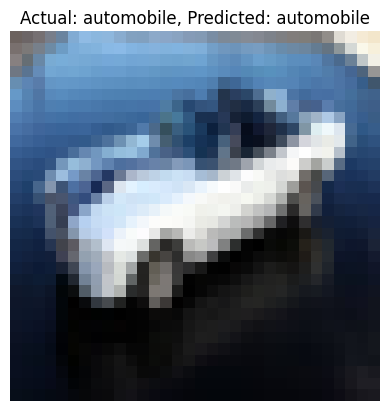

1/1 [==============================] - 0s 62ms/step


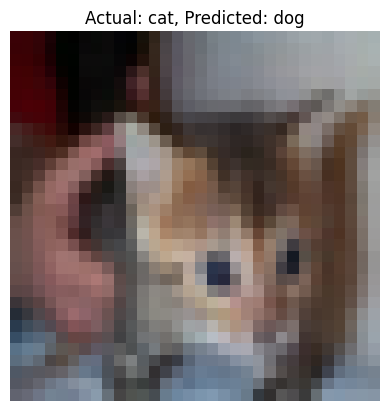

1/1 [==============================] - 0s 66ms/step


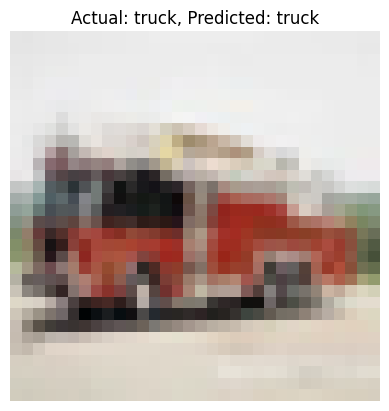

1/1 [==============================] - 0s 61ms/step


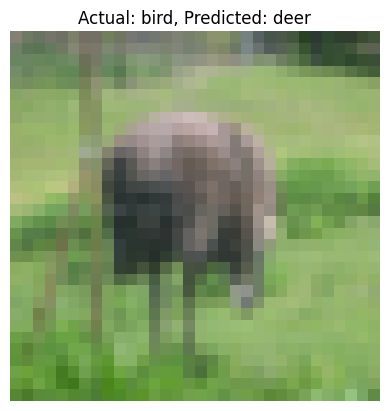

1/1 [==============================] - 0s 59ms/step


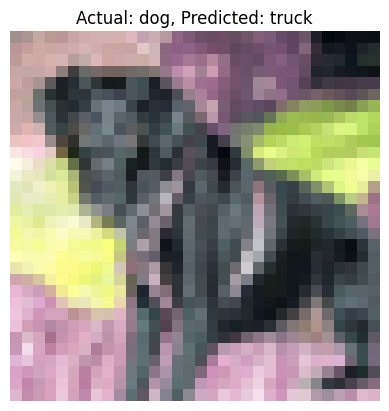

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Select random indices for test images
random_indices = random.sample(range(x_test.shape[0]), 5)

# Display predictions for a few random images
for i, index in enumerate(random_indices):
    img = x_test[index]  # Get the image from the test set
    true_label = np.argmax(y_test[index])  # True label of the image
    prediction = model.predict(np.expand_dims(img, axis=0))  # Model prediction
    predicted_label = np.argmax(prediction)  # Get index of the highest probability

    # Display the image and predicted vs. actual label
    plt.imshow(img)
    plt.title(f"Actual: {class_names[true_label]}, Predicted: {class_names[predicted_label]}")
    plt.axis('off')
    plt.show()